# DonorsChoose

<p>
DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website.
</p>
<p>
    Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:
<ul>
<li>
    How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible</li>
    <li>How to increase the consistency of project vetting across different volunteers to improve the experience for teachers</li>
    <li>How to focus volunteer time on the applications that need the most assistance</li>
    </ul>
</p>    
<p>
The goal of the competition is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
</p>

## About the DonorsChoose Data Set

The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description 
----------|---------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> 
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> 
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> 
**`project_essay_1`**    | First application essay<sup>*</sup>  
**`project_essay_2`**    | Second application essay<sup>*</sup> 
**`project_essay_3`**    | Third application essay<sup>*</sup> 
**`project_essay_4`**    | Fourth application essay<sup>*</sup> 
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` 

<sup>*</sup> See the section <b>Notes on the Essay Data</b> for more details about these features.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description 
----------|---------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   
**`quantity`** | Quantity of the resource required. **Example:** `3`   
**`price`** | Price of the resource required. **Example:** `9.95`   

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description
----------|---------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved.

### Notes on the Essay Data

<ul>
Prior to May 17, 2016, the prompts for the essays were as follows:
<li>__project_essay_1:__ "Introduce us to your classroom"</li>
<li>__project_essay_2:__ "Tell us more about your students"</li>
<li>__project_essay_3:__ "Describe how your students will use the materials you're requesting"</li>
<li>__project_essay_3:__ "Close by sharing why your project will make a difference"</li>
</ul>


<ul>
Starting on May 17, 2016, the number of essays was reduced from 4 to 2, and the prompts for the first 2 essays were changed to the following:<br>
<li>__project_essay_1:__ "Describe your students: What makes your students special? Specific details about their background, your neighborhood, and your school are all helpful."</li>
<li>__project_essay_2:__ "About your project: How will these materials make a difference in your students' learning and improve their school lives?"</li>
<br>For all projects with project_submitted_datetime of 2016-05-17 and later, the values of project_essay_3 and project_essay_4 will be NaN.
</ul>


In [3]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm
import os

# # from plotly import plotly
# # import plotly.offline as offline
# # import plotly.graph_objs as go
# offline.init_notebook_mode()
from collections import Counter

## 1.1 Reading Data

In [3]:
project_data = pd.read_csv('train_data.csv')
resource_data = pd.read_csv('resources.csv')
project_data.project_is_approved.value_counts()

1    92706
0    16542
Name: project_is_approved, dtype: int64

In [4]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
project_data.dropna(subset=['teacher_prefix'],inplace=True)

In [5]:
project_data.isnull().sum()

Unnamed: 0                                           0
id                                                   0
teacher_id                                           0
teacher_prefix                                       0
school_state                                         0
project_submitted_datetime                           0
project_grade_category                               0
project_subject_categories                           0
project_subject_subcategories                        0
project_title                                        0
project_essay_1                                      0
project_essay_2                                      0
project_essay_3                                 105488
project_essay_4                                 105488
project_resource_summary                             0
teacher_number_of_previously_posted_projects         0
project_is_approved                                  0
dtype: int64

In [6]:
resource_data.price.fillna(resource_data.price.mean(), inplace=True)
resource_data.isnull().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

In [7]:
resource_data.quantity.fillna(resource_data.quantity.mean(), inplace=True)
resource_data.isnull().sum()

id               0
description    292
quantity         0
price            0
dtype: int64

In [8]:
y = project_data['project_is_approved'].values
project_data.drop(['project_is_approved'], axis=1, inplace=True)
project_data.head(1)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
0,160221,p253737,c90749f5d961ff158d4b4d1e7dc665fc,Mrs.,IN,2016-12-05 13:43:57,Grades PreK-2,Literacy & Language,"ESL, Literacy",Educational Support for English Learners at Home,My students are English learners that are work...,"\""The limits of your language are the limits o...",NaN,NaN,My students need opportunities to practice beg...,0


In [9]:
print("Number of data points in train data", project_data.shape)
print('-'*50)
print("The attributes of data :", project_data.columns.values)

Number of data points in train data (109245, 16)
--------------------------------------------------
The attributes of data : ['Unnamed: 0' 'id' 'teacher_id' 'teacher_prefix' 'school_state'
 'project_submitted_datetime' 'project_grade_category'
 'project_subject_categories' 'project_subject_subcategories'
 'project_title' 'project_essay_1' 'project_essay_2' 'project_essay_3'
 'project_essay_4' 'project_resource_summary'
 'teacher_number_of_previously_posted_projects']


In [10]:
# how to replace elements in list python: https://stackoverflow.com/a/2582163/4084039
cols = ['Date' if x=='project_submitted_datetime' else x for x in list(project_data.columns)]


#sort dataframe based on time pandas python: https://stackoverflow.com/a/49702492/4084039
project_data['Date'] = pd.to_datetime(project_data['project_submitted_datetime'])
project_data.drop('project_submitted_datetime', axis=1, inplace=True)
project_data.sort_values(by=['Date'], inplace=True)


# how to reorder columns pandas python: https://stackoverflow.com/a/13148611/4084039
project_data = project_data[cols]


project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Math & Science,"Applied Sciences, Health & Life Science",Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Special Needs,Special Needs,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4


In [11]:
print("Number of data points in train data", resource_data.shape)
print(resource_data.columns.values)
resource_data.head(2)

Number of data points in train data (1541272, 4)
['id' 'description' 'quantity' 'price']


,id,description,quantity,price
0,p233245,LC652 - Lakeshore Double-Space Mobile Drying Rack,1,149.00
1,p069063,Bouncy Bands for Desks (Blue support pipes),3,14.95


## 1.2 preprocessing of `project_subject_categories`

In [12]:
catogories = list(project_data['project_subject_categories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python
cat_list = []
for i in catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp+=j.strip()+" " #" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_') # we are replacing the & value into 
    cat_list.append(temp.strip())
    
project_data['clean_categories'] = cat_list
project_data.drop(['project_subject_categories'], axis=1, inplace=True)

from collections import Counter
my_counter = Counter()
for word in project_data['clean_categories'].values:
    my_counter.update(word.split())

cat_dict = dict(my_counter)
sorted_cat_dict = dict(sorted(cat_dict.items(), key=lambda kv: kv[1]))


## 1.3 preprocessing of `project_subject_subcategories`

In [13]:
sub_catogories = list(project_data['project_subject_subcategories'].values)
# remove special characters from list of strings python: https://stackoverflow.com/a/47301924/4084039

# https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
# https://stackoverflow.com/questions/23669024/how-to-strip-a-specific-word-from-a-string
# https://stackoverflow.com/questions/8270092/remove-all-whitespace-in-a-string-in-python

sub_cat_list = []
for i in sub_catogories:
    temp = ""
    # consider we have text like this "Math & Science, Warmth, Care & Hunger"
    for j in i.split(','): # it will split it in three parts ["Math & Science", "Warmth", "Care & Hunger"]
        if 'The' in j.split(): # this will split each of the catogory based on space "Math & Science"=> "Math","&", "Science"
            j=j.replace('The','') # if we have the words "The" we are going to replace it with ''(i.e removing 'The')
        j = j.replace(' ','') # we are placeing all the ' '(space) with ''(empty) ex:"Math & Science"=>"Math&Science"
        temp +=j.strip()+" "#" abc ".strip() will return "abc", remove the trailing spaces
        temp = temp.replace('&','_')
    sub_cat_list.append(temp.strip())

project_data['clean_subcategories'] = sub_cat_list
project_data.drop(['project_subject_subcategories'], axis=1, inplace=True)

# count of all the words in corpus python: https://stackoverflow.com/a/22898595/4084039
my_counter = Counter()
for word in project_data['clean_subcategories'].values:
    my_counter.update(word.split())
    
sub_cat_dict = dict(my_counter)
sorted_sub_cat_dict = dict(sorted(sub_cat_dict.items(), key=lambda kv: kv[1]))

## 1.3 Text preprocessing

In [14]:
# merge two column text dataframe: 
project_data["essay"] = project_data["project_essay_1"].map(str) +\
                        project_data["project_essay_2"].map(str) + \
                        project_data["project_essay_3"].map(str) + \
                        project_data["project_essay_4"].map(str)

In [15]:
project_data.head(2)

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...


In [16]:
#### 1.4.2.3 Using Pretrained Models: TFIDF weighted W2V

In [17]:
# printing some random reviews
print(project_data['essay'].values[0])
print("="*50)
print(project_data['essay'].values[150])
print("="*50)
print(project_data['essay'].values[1000])
print("="*50)
print(project_data['essay'].values[20000])
print("="*50)
print(project_data['essay'].values[99999])
print("="*50)

I have been fortunate enough to use the Fairy Tale STEM kits in my classroom as well as the STEM journals, which my students really enjoyed.  I would love to implement more of the Lakeshore STEM kits in my classroom for the next school year as they provide excellent and engaging STEM lessons.My students come from a variety of backgrounds, including language and socioeconomic status.  Many of them don't have a lot of experience in science and engineering and these kits give me the materials to provide these exciting opportunities for my students.Each month I try to do several science or STEM/STEAM projects.  I would use the kits and robot to help guide my science instruction in engaging and meaningful ways.  I can adapt the kits to my current language arts pacing guide where we already teach some of the material in the kits like tall tales (Paul Bunyan) or Johnny Appleseed.  The following units will be taught in the next school year where I will implement these kits: magnets, motion, si

In [18]:
# https://stackoverflow.com/a/47091490/4084039
import re

def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [19]:
sent = decontracted(project_data['essay'].values[20000])
print(sent)
print("="*50)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.\r\nWe all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.\r\n       Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will al

In [20]:
# \r \n \t remove from string python: http://texthandler.com/info/remove-line-breaks-python/
sent = sent.replace('\\r', ' ')
sent = sent.replace('\\"', ' ')
sent = sent.replace('\\n', ' ')
print(sent)

Some of my students come from difficult family lives, but they do not let that stop them. We have built a community in our classroom that allows each student to be comfortable with who they are. Even though we are a diverse school, everyone feels included. We have a high Hispanic population, and about 90% of the students are on free or reduced-price lunch. Most students are living with a single parent or both parents work full time, although many parents are eager to help in any way they can.  We all know how important it is to get kids up and moving. I want my classroom to be a place where students can be active phyically and mentally. The requested items will allow my students to move all day. When they are sitting in a chair, their movement is limited.         Kindergarten students have a hard time sitting still for long periods of time. They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair. Having these choices in my classroom will allow 

In [21]:
#remove spacial character: https://stackoverflow.com/a/5843547/4084039
sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
print(sent)

Some of my students come from difficult family lives but they do not let that stop them We have built a community in our classroom that allows each student to be comfortable with who they are Even though we are a diverse school everyone feels included We have a high Hispanic population and about 90 of the students are on free or reduced price lunch Most students are living with a single parent or both parents work full time although many parents are eager to help in any way they can We all know how important it is to get kids up and moving I want my classroom to be a place where students can be active phyically and mentally The requested items will allow my students to move all day When they are sitting in a chair their movement is limited Kindergarten students have a hard time sitting still for long periods of time They would much rather bounce on a stability ball or wiggle on a cushion than sit in a hard chair Having these choices in my classroom will allow students to be active and 

In [22]:
# https://gist.github.com/sebleier/554280
# we are removing the words from the stop words list: 'no', 'nor', 'not'
stopwords= ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've",\
            "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', \
            'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their',\
            'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', \
            'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', \
            'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', \
            'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',\
            'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further',\
            'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more',\
            'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', \
            's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', \
            've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn',\
            "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn',\
            "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", \
            'won', "won't", 'wouldn', "wouldn't"]

In [23]:
# Combining all the above stundents 
from tqdm import tqdm
preprocessed_essays = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['essay'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    preprocessed_essays.append(sent.lower().strip())

100%|████████████████████████████████████████████████████████████████████████| 109245/109245 [01:01<00:00, 1772.49it/s]


In [24]:
len(preprocessed_essays)                                                                    

109245

In [25]:
# after preprocesing
preprocessed_essays[20000]

'students come difficult family lives not let stop built community classroom allows student comfortable even though diverse school everyone feels included high hispanic population 90 students free reduced price lunch students living single parent parents work full time although many parents eager help way know important get kids moving want classroom place students active phyically mentally requested items allow students move day sitting chair movement limited kindergarten students hard time sitting still long periods time would much rather bounce stability ball wiggle cushion sit hard chair choices classroom allow students active learn time choices classroom also build greater bond students learn choose seat best fits learning style hopefully able help classmates find seat works students move around room able work everyone instead one group day nannan'

In [26]:
project_resource_summary = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_resource_summary'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e.lower() not in stopwords)
    project_resource_summary.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:06<00:00, 16110.25it/s]


In [27]:
len(project_resource_summary)

109245

In [28]:
project_resource_summary

['students need stem kits learn critical science engineering skills kits focus important science concepts robot works engineering skills',
 'students need boogie boards quiet sensory breaks putty sensory input focus',
 'students need mobile listening center able enhance learning',
 'students need flexible seating classroom choose comfortable learn best',
 'students need copies new york times best seller wonder book okay think deeply compare contrast structures',
 'students need items breakout box including different types locks pens invisible ink keep activities instruction fun engaging',
 'students need flexible seating options allow work personal best ability need standing desks wiggle chairs tables collaboration',
 'students need ipad mini accessories produce movies support collaborative creative projects share understanding science social studies content',
 'students need 1 ipad mini',
 'students need dash dot pack wonder pack explore possibilities coding beginners',
 'students nee

<h2><font color='red'> 1.4 Preprocessing of `project_title`</font></h2>

In [29]:
# similarly you can preprocess the titles also
from tqdm import tqdm
preprocessed_titles = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_title'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_titles.append(sent.lower().strip())
    

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:03<00:00, 36372.83it/s]


In [30]:
len(preprocessed_titles)

109245

In [31]:
from tqdm import tqdm
preprocessed_grade_category = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['project_grade_category'].values):
    sentance = sentance.replace('Grades', '')
    sentance = sentance.replace('-', '_')
    preprocessed_grade_category.append(sentance.lower().strip())

100%|██████████████████████████████████████████████████████████████████████| 109245/109245 [00:00<00:00, 786112.23it/s]


In [32]:
len(preprocessed_grade_category)

109245

In [33]:
from tqdm import tqdm
preprocessed_subject_categories = []
# tqdm is for printing the status bar
for sentance in tqdm(project_data['clean_categories'].values):
    sent = decontracted(sentance)
    sent = sent.replace('\\r', ' ')
    sent = sent.replace('\\"', ' ')
    sent = sent.replace('\\n', ' ')
    sent = re.sub('[^A-Za-z0-9]+', ' ', sent)
    # https://gist.github.com/sebleier/554280
    sent = ' '.join(e for e in sent.split() if e not in stopwords)
    preprocessed_subject_categories.append(sent.lower().strip())

100%|███████████████████████████████████████████████████████████████████████| 109245/109245 [00:02<00:00, 50551.65it/s]


## 1.5 Preparing data for models

In [34]:
project_data.columns
project_data.head()

,Unnamed: 0,id,teacher_id,teacher_prefix,school_state,Date,project_grade_category,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay
55660,8393,p205479,2bf07ba08945e5d8b2a3f269b2b3cfe5,Mrs.,CA,2016-04-27 00:27:36,Grades PreK-2,Engineering STEAM into the Primary Classroom,I have been fortunate enough to use the Fairy ...,My students come from a variety of backgrounds...,Each month I try to do several science or STEM...,It is challenging to develop high quality scie...,My students need STEM kits to learn critical s...,53,Math_Science,AppliedSciences Health_LifeScience,I have been fortunate enough to use the Fairy ...
76127,37728,p043609,3f60494c61921b3b43ab61bdde2904df,Ms.,UT,2016-04-27 00:31:25,Grades 3-5,Sensory Tools for Focus,Imagine being 8-9 years old. You're in your th...,"Most of my students have autism, anxiety, anot...",It is tough to do more than one thing at a tim...,When my students are able to calm themselves d...,My students need Boogie Boards for quiet senso...,4,SpecialNeeds,SpecialNeeds,Imagine being 8-9 years old. You're in your th...
51140,74477,p189804,4a97f3a390bfe21b99cf5e2b81981c73,Mrs.,CA,2016-04-27 00:46:53,Grades PreK-2,Mobile Learning with a Mobile Listening Center,Having a class of 24 students comes with diver...,I have a class of twenty-four kindergarten stu...,By having a mobile listening and storage cente...,A mobile listening center will help keep equip...,My students need a mobile listening center to ...,10,Literacy_Language,Literacy,Having a class of 24 students comes with diver...
473,100660,p234804,cbc0e38f522143b86d372f8b43d4cff3,Mrs.,GA,2016-04-27 00:53:00,Grades PreK-2,Flexible Seating for Flexible Learning,I recently read an article about giving studen...,I teach at a low-income (Title 1) school. Ever...,We need a classroom rug that we can use as a c...,"Benjamin Franklin once said, \""Tell me and I f...",My students need flexible seating in the class...,2,AppliedLearning,EarlyDevelopment,I recently read an article about giving studen...
41558,33679,p137682,06f6e62e17de34fcf81020c77549e1d5,Mrs.,WA,2016-04-27 01:05:25,Grades 3-5,Going Deep: The Art of Inner Thinking!,"My students crave challenge, they eat obstacle...","We are an urban, public k-5 elementary school....",With the new common core standards that have b...,These remarkable gifts will provide students w...,My students need copies of the New York Times ...,2,Literacy_Language,Literacy,"My students crave challenge, they eat obstacle..."


In [35]:
import math 
project_data['teacher_prefix'] = project_data['teacher_prefix'].str.replace('.', '')


In [36]:
price_data = resource_data.groupby('id').agg({'price':'sum', 'quantity':'sum'}).reset_index()


### Combining all the preprossed features to a data frame to split the data to train and test split 


In [37]:
import numpy as np 
import pandas as pd 
catagories=list(project_data.clean_categories[0:10000])
preprocessed_grade_category =list(preprocessed_grade_category[0:10000])
preprocessed_titles= list(preprocessed_titles[0:10000])
school_state=list(project_data.school_state[0:10000])
clean_subcategories=list(project_data.clean_subcategories[0:10000])
project_resource_summary=list(project_resource_summary[0:10000])
preprocessed_essays=list(preprocessed_essays[0:10000])
teacher_prefix=list(project_data.teacher_prefix[0:10000])
id=list(project_data.id[0:10000])
y=y[0:10000]


price=price_data.price[0:10000]
quantity=price_data.quantity[0:10000]


In [38]:
preprocessed_grade_category =list(preprocessed_grade_category[0:20000])
len(y)

10000

In [39]:
import numpy as np 
#https://stackoverflow.com/questions/18689823/pandas-dataframe-replace-nan-values-with-average-of-columns
x=pd.DataFrame(dict(preprocessed_titles = preprocessed_titles, preprocessed_grade_category = preprocessed_grade_category,catagories=catagories,school_state=school_state,clean_subcategories=clean_subcategories,project_resource_summary=project_resource_summary,preprocessed_essays=preprocessed_essays,id=id,teacher_prefix=teacher_prefix,price=price,quantity=quantity))


In [40]:

x.isnull().sum()


preprocessed_titles            0
preprocessed_grade_category    0
catagories                     0
school_state                   0
clean_subcategories            0
project_resource_summary       0
preprocessed_essays            0
id                             0
teacher_prefix                 0
price                          0
quantity                       0
dtype: int64

### spliting the data into training test and cv and performing various feature operations.

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)


we are going to consider

       - school_state : categorical data
       - clean_categories : categorical data
       - clean_subcategories : categorical data
       - project_grade_category : categorical data
       - teacher_prefix : categorical data
       
       - project_title : text data
       - text : text data
       - project_resource_summary: text data (optinal)
       
       - quantity : numerical (optinal)
       - teacher_number_of_previously_posted_projects : numerical
       - price : numerical

In [42]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(6700, 11) (6700,)
(3300, 11) (3300,)


### Essays BOW encoding 

In [43]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_bow = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_bow = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 5000) (6700,)
(3300, 5000) (3300,)


### Project Titles BOW encoding 

In [44]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,3), max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_titles_bow = vectorizer.transform(X_train['preprocessed_titles'].values)
X_test_titles_bow = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_titles_bow.shape, y_train.shape)
print(X_test_titles_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 627) (6700,)
(3300, 627) (3300,)


### Project Resource Summary BOW encoding 

In [45]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_resource_bow = vectorizer.transform(X_train['project_resource_summary'].values)
X_test_resource_bow = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_resource_bow.shape, y_train.shape)
print(X_test_resource_bow.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 631) (6700,)
(3300, 631) (3300,)


### 1.5.1 Vectorizing Categorical data

### one hot encoding the catogorical features: state

- https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/

In [46]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)

print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6700, 51) (6700,)
(3300, 51) (3300,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


### one hot encoding the catogorical features: teachers prefix

In [47]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6700, 5) (6700,)
(3300, 5) (3300,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### one hot encoding the catogorical features: subject catagories 

In [48]:
# we use count vectorizer to convert the values into one 
catagories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['catagories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_catagories_ohe = vectorizer.transform(X_train['catagories'].values)

X_test_catagories_ohe = vectorizer.transform(X_test['catagories'].values)

print("After vectorizations")
print(X_train_catagories_ohe.shape, y_train.shape)
print(X_test_catagories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6700, 7) (6700,)
(3300, 7) (3300,)
['appliedlearning', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds']


### one hot encoding the catogorical features: subject sub catagories 

In [49]:
catagories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_sub_catagories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_sub_catagories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)

print("After vectorizations")
print(X_train_sub_catagories_ohe.shape, y_train.shape)
print(X_test_sub_catagories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6700, 28) (6700,)
(3300, 28) (3300,)
['appliedsciences', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts']


### one hot encoding the catogorical features: project grade catogory 

In [50]:
preprocessed_grade_category
catagories
vectorizer = CountVectorizer()
vectorizer.fit(X_train['preprocessed_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_catagories_ohe = vectorizer.transform(X_train['preprocessed_grade_category'].values)
X_test_grade_catagories_ohe = vectorizer.transform(X_test['preprocessed_grade_category'].values)

print("After vectorizations")
print(X_train_grade_catagories_ohe.shape, y_train.shape)
print(X_test_grade_catagories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(6700, 4) (6700,)
(3300, 4) (3300,)
['3_5', '6_8', '9_12', 'prek_2']


### Normalizing numerical value price 

In [51]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 1) (6700,)
(3300, 1) (3300,)


### Normalizing numerical value quantity 

In [52]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(X_train['quantity'].values.reshape(-1,1))

X_train_quantity_norm = normalizer.transform(X_train['quantity'].values.reshape(-1,1))

X_test_quantity_norm = normalizer.transform(X_test['quantity'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_quantity_norm.shape, y_train.shape)

print(X_test_quantity_norm.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 1) (6700,)
(3300, 1) (3300,)


In [53]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow,X_train_titles_bow,X_train_resource_bow,X_train_state_ohe,X_train_teacher_ohe,X_train_catagories_ohe,X_train_sub_catagories_ohe,X_train_grade_catagories_ohe,X_train_price_norm,X_train_quantity_norm))
X_te = hstack((X_test_essay_bow,X_test_titles_bow,X_test_resource_bow,X_test_state_ohe,X_test_teacher_ohe,X_test_catagories_ohe,X_test_sub_catagories_ohe,X_test_grade_catagories_ohe,X_test_price_norm,X_test_quantity_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(6700, 6355) (6700,)
(3300, 6355) (3300,)


### Grid Search for KNN for BOW excoded text 

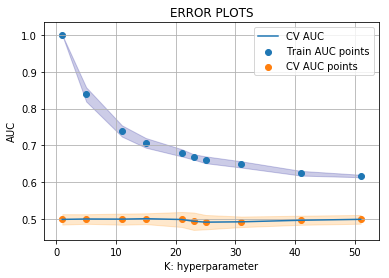

In [54]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[1, 5, 11, 15, 21, 23,25,31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')

plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [55]:
clf.best_estimator_ 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=15, p=2,
           weights='uniform')

In [56]:
clf.best_params_ 

{'n_neighbors': 15}

## best k=22 for BOW text encoding and test AUC=.512

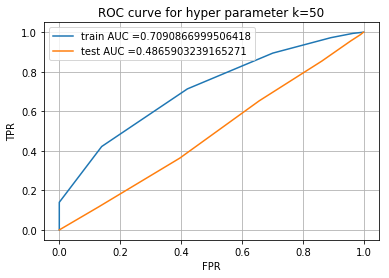

In [57]:
from sklearn.metrics import roc_curve, auc


neigh = KNeighborsClassifier(n_neighbors=15,n_jobs=-1)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_tr)    
y_test_pred = neigh.predict_proba(X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curve for hyper parameter k=50")
plt.grid()
plt.show()

In [57]:
train_tpr

array([0.        , 0.00157708, 0.01314233, 0.05546064, 0.14114864,
       0.27835458, 0.43869102, 0.59377053, 0.73583914, 0.84097779,
       0.91102642, 0.95360757, 0.97739519, 0.99014325, 0.99526876,
       0.99763438, 0.99947431, 0.99973715, 1.        ])

### Essays Tfidf encoding 

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_essays'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_essay_tfidf = vectorizer.transform(X_train['preprocessed_essays'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)

print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 5000) (6700,)
(3300, 5000) (3300,)


### Project Title tfidf encoding 

In [60]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['preprocessed_titles'].values) 
X_train_titles_tfidf = vectorizer.transform(X_train['preprocessed_titles'].values)

X_test_titles_tfidf = vectorizer.transform(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(X_train_titles_tfidf.shape, y_train.shape)

print(X_test_titles_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 631) (6700,)
(3300, 631) (3300,)


### Project Resource summary tfidf 

In [62]:
vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['project_resource_summary'].values)
X_train_resource_tfidf = vectorizer.transform(X_train['project_resource_summary'].values)

X_test_resource_tfidf = vectorizer.transform(X_test['project_resource_summary'].values)

print("After vectorizations")
print(X_train_resource_tfidf.shape, y_train.shape)

print(X_test_resource_tfidf.shape, y_test.shape)
print("="*100)

After vectorizations
(6700, 1908) (6700,)
(3300, 1908) (3300,)


### combining tfidf tesxt encoding with rest of the features 

In [63]:
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_resource_tfidf,X_train_state_ohe,X_train_teacher_ohe,X_train_catagories_ohe,X_train_sub_catagories_ohe,X_train_grade_catagories_ohe,X_train_price_norm,X_train_quantity_norm))

X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_resource_tfidf,X_test_state_ohe,X_test_teacher_ohe,X_test_catagories_ohe,X_test_sub_catagories_ohe,X_test_grade_catagories_ohe,X_test_price_norm,X_test_quantity_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(6700, 7636) (6700,)
(3300, 7636) (3300,)


### Grid Search for KNN for TFIDF excoded text 

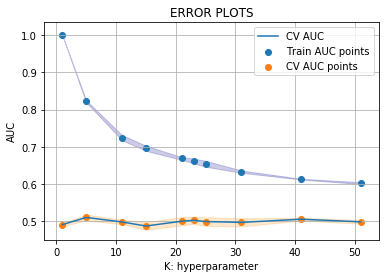

In [64]:
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[1, 5, 11, 15, 21, 23,25,31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')

plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [65]:
clf.best_params_ 

{'n_neighbors': 5}

### best k=22 for tfidf  text encoded data and the AUC for test data is .5

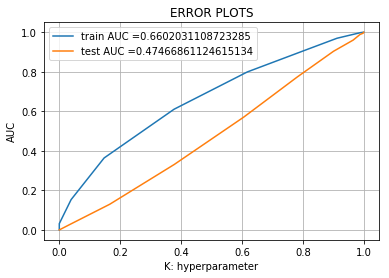

In [66]:
neigh = KNeighborsClassifier(n_neighbors=22,n_jobs=-1)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_tr)    
y_test_pred = neigh.predict_proba(X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Average W2V encoding for essays

In [67]:
with open('glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [68]:
def preprocessing(x):
    avg_w2v_vectors_essay = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(x): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        cnt_words =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if word in glove_words:
                vector += model[word]
                cnt_words += 1
        if cnt_words != 0:
            vector /= cnt_words
        avg_w2v_vectors_essay.append(vector)
    return avg_w2v_vectors_essay
    


### Essays AVG_W2V encoding 

In [69]:
X_train_essay_avg_W2V = preprocessing(X_train['preprocessed_essays'].values)

X_test_essay_avg_W2Vf = preprocessing(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(len(X_train_essay_avg_W2V), y_train.shape)

print(len(X_test_essay_avg_W2Vf), y_test.shape)
print("="*100)

100%|████████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 3371.48it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


In [93]:
X_train['preprocessed_essays'].shape

(8978,)

### Projecgt Title AVG_W2V encoding 

In [70]:
X_train_titles_AVG_W2V = preprocessing(X_train['preprocessed_titles'].values)

X_test_titles_AVG_W2V = preprocessing(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(len(X_train_titles_AVG_W2V), y_train.shape)

print(len(X_test_titles_AVG_W2V), y_test.shape)
print("="*100)

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 47957.82it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


### Project resource summary AVG_W2V encoding 

In [71]:
X_train_resource_AVG_W2V = preprocessing(X_train['project_resource_summary'].values)

X_test_resource_AVG_W2V = preprocessing(X_test['project_resource_summary'].values)

print("After vectorizations")
print(len(X_train_resource_AVG_W2V), y_train.shape)

print(len(X_test_resource_AVG_W2V), y_test.shape)
print("="*100)

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 25643.63it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


In [73]:
X_tr = hstack((X_train_essay_avg_W2V,X_train_titles_AVG_W2V,X_train_resource_AVG_W2V,X_train_state_ohe,X_train_teacher_ohe,X_train_catagories_ohe,X_train_sub_catagories_ohe,X_train_grade_catagories_ohe,X_train_price_norm,X_train_quantity_norm))

X_te = hstack((X_test_essay_avg_W2Vf,X_test_titles_AVG_W2V,X_test_resource_AVG_W2V,X_test_state_ohe,X_test_teacher_ohe,X_test_catagories_ohe,X_test_sub_catagories_ohe,X_test_grade_catagories_ohe,X_test_price_norm,X_test_quantity_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(6700, 997) (6700,)
(3300, 997) (3300,)


### Grid Search KNN for AVG_W2V

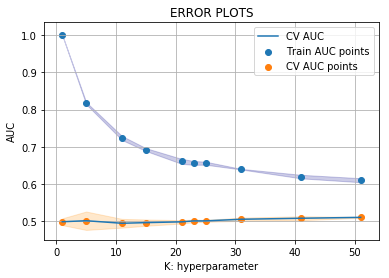

In [74]:
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[ 1, 5, 11, 15, 21, 23,25,31, 41, 51]}
clf = GridSearchCV(neigh, parameters, cv=3, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')

plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [75]:
clf.best_params_ 

{'n_neighbors': 51}

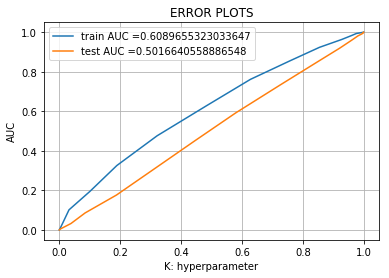

In [77]:
neigh = KNeighborsClassifier(n_neighbors=51,n_jobs=-1)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_tr)    
y_test_pred = neigh.predict_proba(X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [79]:
def tfidf_processing(x):
    tfidf_model = TfidfVectorizer()
    tfidf_model.fit(x)
# we are converting a dictionary with word as a key, and the idf as a value
    dictionary = dict(zip(tfidf_model.get_feature_names(), list(tfidf_model.idf_)))
    tfidf_words = set(tfidf_model.get_feature_names())


    tfidf_w2v_vectors= []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(x): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
            # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)
    
    return tfidf_w2v_vectors
    


### Project Essay tfidf_W2V encoding 

In [80]:
X_train_essay_tfidf = tfidf_processing(X_train['preprocessed_essays'].values)

X_test_essay_tfidf = tfidf_processing(X_test['preprocessed_essays'].values)

print("After vectorizations")
print(len(X_train_essay_tfidf), y_train.shape)

print(len(X_test_essay_tfidf), y_test.shape)
print("="*100)

100%|█████████████████████████████████████████████████████████████████████████████| 3300/3300 [00:06<00:00, 491.17it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


### Project Title tfidf_W2V encoding 

In [81]:
X_train_titles_tfidf_W2V = tfidf_processing(X_train['preprocessed_titles'].values)
X_test_titles_tfidf_W2V = tfidf_processing(X_test['preprocessed_titles'].values)

print("After vectorizations")
print(len(X_train_titles_tfidf_W2V), y_train.shape)

print(len(X_test_titles_tfidf_W2V), y_test.shape)
print("="*100)

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 26733.11it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


### Project Resource tfidf_W2V encoding 

In [82]:
X_train_resource_tfidf_W2V = tfidf_processing(X_train['project_resource_summary'].values)

X_test_resource_tfidf_W2V = tfidf_processing(X_test['project_resource_summary'].values)

print("After vectorizations")
print(len(X_train_resource_tfidf_W2V), y_train.shape)

print(len(X_test_resource_tfidf_W2V), y_test.shape)
print("="*100)

100%|███████████████████████████████████████████████████████████████████████████| 3300/3300 [00:00<00:00, 11079.73it/s]


After vectorizations
6700 (6700,)
3300 (3300,)


### combining Tfidf w2v  encoding 

In [87]:
from scipy.sparse import hstack
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf_W2V,X_train_resource_tfidf_W2V,X_train_state_ohe,X_train_teacher_ohe,X_train_catagories_ohe,X_train_sub_catagories_ohe,X_train_grade_catagories_ohe,X_train_price_norm,X_train_quantity_norm))

X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf_W2V,X_test_resource_tfidf_W2V,X_test_state_ohe,X_test_teacher_ohe,X_test_catagories_ohe,X_test_sub_catagories_ohe,X_test_grade_catagories_ohe,X_test_price_norm,X_test_quantity_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(6700, 997) (6700,)
(3300, 997) (3300,)


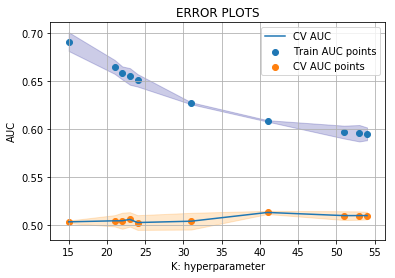

In [84]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score

neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors': [15, 21,23, 31, 41, 51,53]}
clf = GridSearchCV(neigh, parameters, cv=2, scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr, y_train)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')

plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [85]:
clf.best_params_ 

{'n_neighbors': 41}

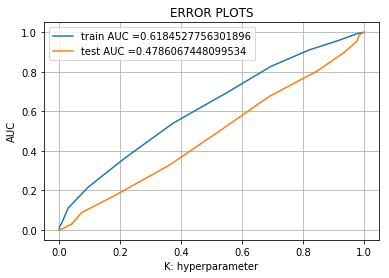

In [86]:
neigh = KNeighborsClassifier(n_neighbors=41,n_jobs=-1)
neigh.fit(X_tr, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_tr)    
y_test_pred = neigh.predict_proba(X_te)
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

### Feature selection on TFIDF

In [123]:
X_tr = hstack((X_train_essay_tfidf,X_train_titles_tfidf,X_train_resource_tfidf,X_train_state_ohe,X_train_teacher_ohe,X_train_catagories_ohe,X_train_sub_catagories_ohe,X_train_grade_catagories_ohe,X_train_price_norm,X_train_quantity_norm))

X_te = hstack((X_test_essay_tfidf,X_test_titles_tfidf,X_test_resource_tfidf,X_test_state_ohe,X_test_teacher_ohe,X_test_catagories_ohe,X_test_sub_catagories_ohe,X_test_grade_catagories_ohe,X_test_price_norm,X_test_quantity_norm))

print("Final Data matrix")
print(X_tr.shape, y_train.shape)

print(X_te.shape, y_test.shape)
print("="*100)

Final Data matrix
(6700, 2936) (6700,)
(3300, 2936) (3300,)


In [105]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2


In [127]:
y1=y[0:6700]
y2=y[6700:10000]
print(len(y1))
print(len(y2))
x_tr=abs(X_tr)

6700
3300


In [135]:
X_tr=abs(X_tr)
X_tr_fit=SelectKBest(score_func=chi2,k=20).fit(X_tr,y1)
X_tr_reduced=X_tr_fit.transform(X_tr)
X_te_reduced=X_tr_fit.transform(X_te)
print("the reduced train data dimention are",X_tr_reduced.shape)
print("the reduced test data dimention are",X_te_reduced.shape)

the reduced train data dimention are (6700, 20)
the reduced test data dimention are (3300, 20)


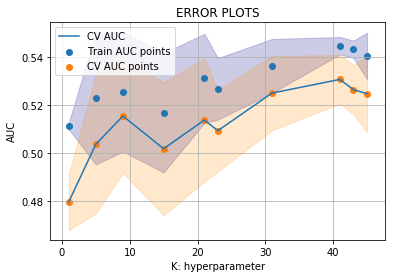

In [141]:
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
neigh = KNeighborsClassifier(n_jobs=-1)
parameters = {'n_neighbors':[1, 5,9, 15, 21,23, 31, 41,43,45]}
clf = GridSearchCV(neigh, parameters, cv=3,scoring='roc_auc',n_jobs=-1)
clf.fit(X_tr_reduced,y1)

train_auc= clf.cv_results_['mean_train_score']
train_auc_std= clf.cv_results_['std_train_score']
cv_auc = clf.cv_results_['mean_test_score'] 
cv_auc_std= clf.cv_results_['std_test_score']


plt.gca().fill_between(parameters['n_neighbors'],train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(parameters['n_neighbors'], cv_auc, label='CV AUC')

plt.gca().fill_between(parameters['n_neighbors'],cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(parameters['n_neighbors'], train_auc, label='Train AUC points')
plt.scatter(parameters['n_neighbors'], cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [142]:
clf.best_params_ 

{'n_neighbors': 41}

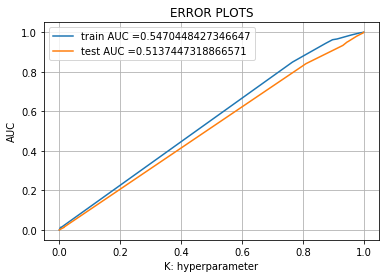

In [144]:
neigh = KNeighborsClassifier(n_neighbors=41,n_jobs=-1)
neigh.fit(X_tr_reduced, y1)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = neigh.predict_proba(X_tr_reduced)    
y_test_pred = neigh.predict_proba(X_te_reduced)
pred= neigh.predict(X_te_reduced)
train_fpr, train_tpr, tr_thresholds = roc_curve(y1, y_train_pred[:, 1])
test_fpr, test_tpr, te_thresholds = roc_curve(y2, y_test_pred[:, 1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [77]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [70]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["Encoding", "n_neighbours", "AUC-Test Data"]

x.add_row(["BOW",15,48])
x.add_row(["TFIDF",5,47])
x.add_row(["AVG-W2V",15,50])
x.add_row(["TF-IDF-W2V",141,47])
x.add_row(["TF-IDF(reduced dim)",41,51])
print(x)

+---------------------+--------------+---------------+
|       Encoding      | n_neighbours | AUC-Test Data |
+---------------------+--------------+---------------+
|         BOW         |      22      |       50      |
|        TFIDF        |      22      |       47      |
|       AVG-W2V       |      15      |       48      |
|      TF-IDF-W2V     |      15      |       48      |
| TF-IDF(reduced dim) |      31      |       53      |
+---------------------+--------------+---------------+


### Conclusions the best model is tfidf which has best AUC 51 for test and train data for the hyper parameter k=41 above are the tabulated results   

In [145]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y2,pred)

array([[   0,  512],
       [   0, 2788]], dtype=int64)

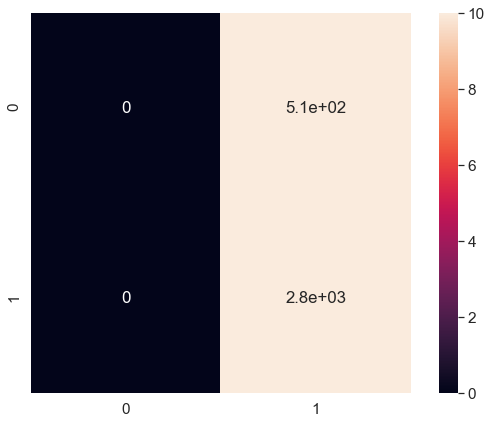

In [159]:
import seaborn as sn
import matplotlib.pyplot as plt

array = [[   0,  512],
       [   0, 2788]]        

df_cm = pd.DataFrame(array, range(2),
                  range(2))
plt.figure(figsize = (10,7))

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,square=True,vmax=10)# font size